## SIR model with ten groups

Este modelo es una extensión de lo descrito en `one_group.ipynb` a ters grupos (etarios, geográficos, etc.).

Las definiciones son muy similares al documento anterior con la diferencia que **S**, **I** y **R** es un array de *Tmax*X10, es decir, hay una serie temporal de cada uno de estos compartimientos para cada centro. Otra cosa que se debe modificar son las condiciones iniciales (una para cada centro) y la matrix de contacto `contactMatrix`.

In [5]:
# M=1, SIR with one age-groups

import numpy as np
import pyross
import copy
from time import perf_counter

import matplotlib.pyplot as plt

In [27]:
# The definition of the model as a Python dictionary
model_spec = { "classes" : ["S", "I"],

             "S" : {"infection" : [ ["I","S", "-beta"] ]},  ## the I class passes infection to S class
             "I" : { "linear"   : [ ["I", "-gamma"] ],     ## this is recovery process for I class
                    "infection" : [ ["I", "S", "beta"] ]}    
              ## the recovered class R is internally determined by number conservation
             }
             
parameters = {'beta'  : 0.5,
              'gamma' : 0.1, 
              }

M=10;  Ni=1000*np.ones(M);  N=np.sum(Ni) 

# Initial conditions as an array
x0 = np.array([
    500, 980, 1000, 900, 980, 1000, 900, 980, 1000, 900,  # S
    500,  20,    0, 100,  20,    0, 100,  20,    0, 100,  # I
])

CM = np.array( [[1, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                [0.3, 1, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                [0.3, 0.3, 1, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1],
                [0.1, 0.3, 0.3, 1, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1],
                [0.1, 0.1, 0.3, 0.3, 1, 0.3, 0.1, 0.1, 0.1, 0.1],
                [0.1, 0.1, 0.1, 0.3, 0.3, 1, 0.3, 0.1, 0.1, 0.1],
                [0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 1, 0.3, 0.1, 0.1],
                [0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 1, 0.3, 0.1],
                [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 1, 0.3],
                [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 1]], dtype=float)

def contactMatrix(t):
    return CM

# duration of simulation and data file
Tf = 160;  Nf = Tf*10+1


In [28]:
# Define de model
model = pyross.deterministic.Model(model_spec, parameters, M, Ni)

In [33]:
# Simulate (and time) the model 
n = 1000
t_10 = np.empty([n, 1])
for i in range(n):
  t_ini = perf_counter()
  data = model.simulate(x0, contactMatrix, Tf, Nf)
  t_end = perf_counter() - t_ini
  t_10[i] = t_end


In [37]:
t_10.std()

7.52196137071913e-05

### La suma de SIR de los tres centros

Text(0.5, 0, 'Days')

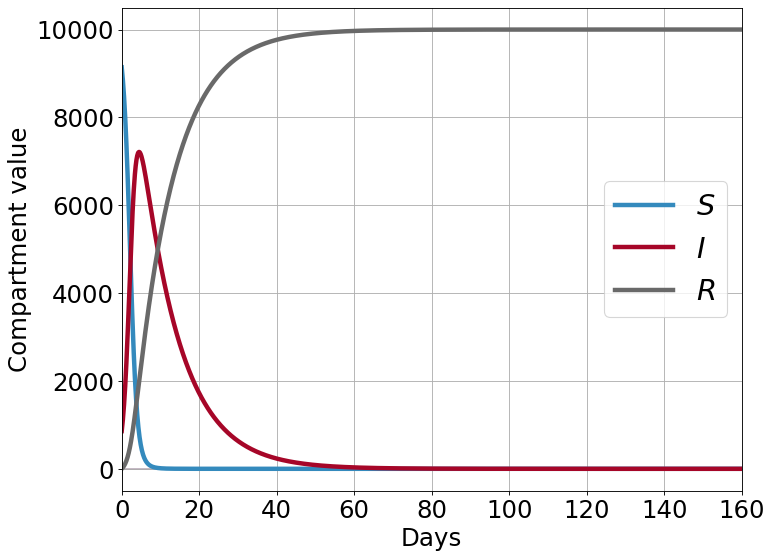

In [31]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
I = np.sum(model.model_class_data('I', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I/N, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days')

### La serie temporal de los infectados de los tres centros

Text(0.5, 0, 'Days')

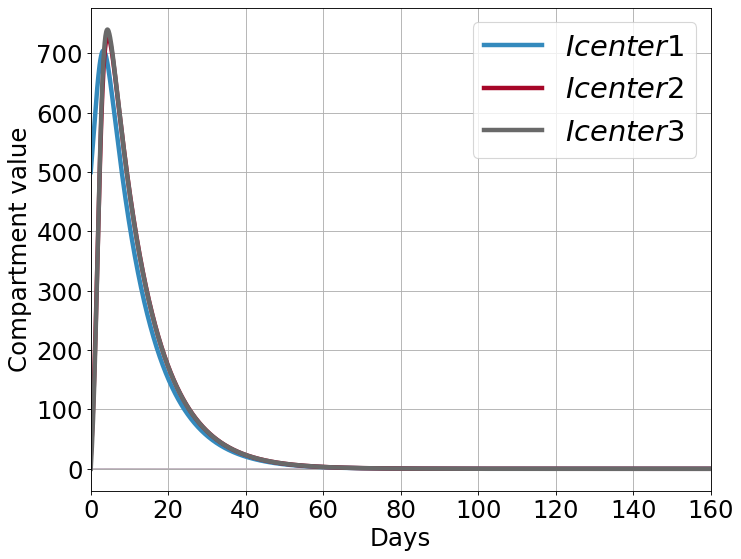

In [32]:
S = model.model_class_data('I', data)[:,0]
I = model.model_class_data('I', data)[:,1]
R = model.model_class_data('I', data)[:,2]
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$I center 1$', lw=4)

plt.fill_between(t, 0, I/N, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I center 2$', lw=4)

plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$I center 3$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days')